### Задание "Оценка точности модели"
* Посчитать tpr и fpr. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.
* Построить график Precision - Recall на этих же данных.

In [1]:
# загрузим основные библиотеки для работы
import pandas as pd
import numpy as np

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
# загрузим датасет по класификации атлетов
data = pd.read_csv('C:\\Users\\HP\\Desktop\\DataAnalitics\\Feature Engineering\\Practice\\ноутбук_и_дополнительнае_материалы-_Оценка_точности_модели__переобучение__регуляризация\\athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [9]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

#### Строим модель логистической регрессии

In [10]:
# Формируем набор признаков и целевую переменную 
features_columns = [c for c in data.columns if c != 'sex']
X = data[features_columns]
X.head()

,id,name,nationality,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,11/26/90,1.81,71.0,cycling,0,0,0


In [11]:
# Будем предсказывать пол атлета
y = data['sex']

In [7]:
# Преобразуем категориальные данные в числа
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [12]:
ft = ohe.fit_transform(data[['nationality', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']])

In [13]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X.head()

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0
4,1.81,71.0,0,0,0


In [14]:
le.fit(data['sex'])

LabelEncoder()

In [15]:
# Закодировала категории male и female в числа 1 и 0 соответственно.
y = pd.Series(data = le.transform(data['sex']))
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int32

In [16]:
# Строим логистическую модель
model = LogisticRegression()

In [17]:
# Разбиваем данные на обучающую и тестовую выборки в соотношении 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
# Обучаем модель
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
# Получаем прогнозные значения модели (переменная predictions)
predictions = model.predict_proba(X_test)

In [23]:
# Модель возвращает нам класс (прогноз по полу атлета) и какова вероятность этих классов
for line in zip(predictions[:, 1], y_test):
    print(line)

(0.7160231990864888, 1)
(0.8005554308777157, 1)
(0.028616170018163946, 0)
(0.6337306401524706, 1)
(0.7792929082642128, 1)
(0.4480973379396926, 1)
(0.6499257858208932, 1)
(0.7717518914581666, 0)
(0.8355410408525507, 1)
(0.8204053246565319, 1)
(0.8544353589525967, 0)
(0.23800390940848287, 0)
(0.14718873042214936, 0)
(0.17209626835371616, 0)
(0.6356068005126723, 1)
(0.7898272744789833, 1)
(0.6725617701907158, 1)
(0.6582904380607398, 1)
(0.35594271069544875, 0)
(0.7961871433751824, 1)
(0.5104304855089606, 0)
(0.6535988516037987, 1)
(0.41313501746300085, 1)
(0.8356822273685615, 1)
(0.9248575103579483, 1)
(0.9011880209347465, 0)
(0.611890328469331, 1)
(0.19113934064056387, 1)
(0.45009928062175936, 0)
(0.04141498482161058, 0)
(0.9977095896454548, 1)
(0.9170423494521953, 1)
(0.7429065364201134, 1)
(0.6875156342384452, 1)
(0.46759260809438574, 1)
(0.09924973939421877, 0)
(0.24712868990115572, 1)
(0.2804066171642844, 0)
(0.9740271905289761, 1)
(0.22312891186020556, 0)
(0.41509824176614823, 0)
(0

(0.3674089430661874, 1)
(0.6337306401524706, 1)
(0.3162831512501716, 1)
(0.23819036329834448, 0)
(0.11068940461538358, 0)
(0.9933158582791624, 1)
(0.08606252670327348, 0)
(0.9579507037775402, 1)
(0.7163774906620832, 1)
(0.25101687125973704, 0)
(0.35119133249796536, 0)
(0.999071708246246, 1)
(0.41509824176614823, 0)
(0.5895910900569276, 1)
(0.2592489798087066, 0)
(0.06396988038158168, 0)
(0.2106929326114545, 0)
(0.8214320416439606, 0)
(0.23280590229610595, 1)
(0.7628847485613647, 1)
(0.9428734650801865, 0)
(0.4287603032798448, 0)
(0.11745247352784027, 0)
(0.21907167295662455, 0)
(0.40963836881756277, 0)
(0.867094270460178, 1)
(0.9793322195003604, 1)
(0.8073823294787904, 1)
(0.4624209136738644, 1)
(0.9368040117550472, 1)
(0.939739751660462, 0)
(0.7080790195774088, 1)
(0.9822033610986388, 1)
(0.2155359181358975, 1)
(0.7456548783413688, 1)
(0.7250963243998789, 0)
(0.22155211417090726, 0)
(0.1208527042210248, 0)
(0.22657305767598776, 0)
(0.10849080880872068, 0)
(0.2833295640122251, 1)
(0.84

(0.8497764142371046, 1)
(0.1966452647774262, 0)
(0.48718733421016125, 0)
(0.5739940651564773, 0)
(0.7420259176881409, 1)
(0.35224144240911565, 1)
(0.13780649723610017, 0)
(0.48041021976837495, 0)
(0.7654869393663521, 1)
(0.8755111571988843, 1)
(0.6820296920084659, 1)
(0.8306427496788091, 1)
(0.9831565509418209, 1)
(0.46084311712241627, 0)
(0.17043998895132256, 0)
(0.3790271714176705, 1)
(0.27461628355886364, 0)
(0.2106929326114545, 0)
(0.18794590699101957, 0)
(0.23915718888745294, 0)
(0.6834048830240543, 1)
(0.5423847580803521, 0)
(0.43584793093760993, 1)
(0.5582484103084434, 0)
(0.18383917038039388, 0)
(0.18479363787807968, 0)
(0.09669756656420977, 0)
(0.23136380138393536, 0)
(0.163153073711524, 0)
(0.8433250625324223, 1)
(0.645181256049727, 1)
(0.9223722916736151, 1)
(0.9176558530503033, 1)
(0.3912008891160374, 0)
(0.29652602599200184, 0)
(0.9745479593805025, 1)
(0.3446393660429083, 1)
(0.163153073711524, 0)
(0.27461628355886364, 1)
(0.6389447165665902, 1)
(0.32673713789088726, 1)
(0

(0.1564844707924349, 0)
(0.4221269173556344, 0)
(0.7001502469483446, 1)
(0.9028729073237599, 1)
(0.09028264257188023, 0)
(0.9350725020309952, 1)
(0.18331976975631578, 0)
(0.7654869393663521, 0)
(0.8326644448697981, 1)
(0.7756965787607565, 1)
(0.8355410408525507, 1)
(0.9323923262656424, 1)
(0.7382365945765297, 1)
(0.48718733421016125, 0)
(0.894569816443632, 1)
(0.966426221254009, 1)
(0.38501455571744075, 1)
(0.22155211417090726, 0)
(0.8577782262890061, 1)
(0.7819418444510607, 1)
(0.36405922497577486, 1)
(0.53362862445611, 0)
(0.32180456854757483, 1)
(0.3413852111207286, 0)
(0.8171564238893978, 1)
(0.4252272302212029, 0)
(0.11079062103753189, 0)
(0.1711936109993387, 0)
(0.549543723403974, 1)
(0.6843935174946014, 0)
(0.26890083793531067, 1)
(0.23331176313516405, 1)
(0.20255153225797046, 0)
(0.03426483675989598, 0)
(0.9542428132812337, 1)
(0.7376893257575344, 1)
(0.9699283188026623, 1)
(0.8694717787942294, 1)
(0.7778980375659241, 0)
(0.7537830293794895, 1)
(0.06445610248318802, 0)
(0.76173

In [25]:
# Оценим качество модели при помощи метода .score()  
# аккуратность составляет 77%, ошибка обобщения - 23%
model.score(X_test, y_test)

0.7725598526703499

In [26]:
# Посчитаем матрицу ошибок
tp = 0 # True positive 
fp = 0 # False positive - ошибка 1 рода (ложная тревога)
fn = 0 # False negative - ошибка 2 рода (пропуск цели)
tn = 0 # True negative

for predicted_prob, actual in zip(predictions[:, 1], y_test):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [37]:
# Посчитаем показатель ложно положительных результатов
FPR = fp / (fp + tn)
FPR

0.21913161465400272

In [38]:
# Посчитаем показатель истинно положительных результатов
TPR = tp / (tp + fn)
TPR

0.765695067264574

In [28]:
# Посчитаем аккуратность - долю правильно предсказанных от всех вариантов
accuracy = (tp + tn) / (tp + fp + fn + tn)
accuracy

0.7725598526703499

In [29]:
# Посчитаем точность - долю правильно предсказанных среди причисленных моделью к категории 1
precision = tp / (tp + fp)
precision

0.8087625814091178

In [30]:
# Посчитаем recall - долю правильно предсказанных среди категории 1
recall = tp / (tp + fn)
recall

0.765695067264574

#### Все метрики имеют высокие значения, что говорит и качестве нашей модели. Посчитаем теперь метрики с использованием готовых библиотек

In [31]:
# Метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [32]:
pr, re, thres = precision_recall_curve(y_test, predictions[:, 1])

In [33]:
# Посмотрим что получилось
for line in zip(pr, re, thres):
    print(line)

(0.551980198019802, 1.0, 0.038577713482299755)
(0.5518415351284433, 0.999439461883408, 0.039312340301005305)
(0.5520123839009288, 0.999439461883408, 0.03955280864997966)
(0.5521833384948901, 0.999439461883408, 0.0406646374544064)
(0.5523543990086741, 0.999439461883408, 0.04123171667545472)
(0.5525255655407499, 0.999439461883408, 0.04141498482161058)
(0.5526968381897086, 0.999439461883408, 0.04148341862493282)
(0.5528682170542636, 0.999439461883408, 0.04159609721031504)
(0.5530397022332506, 0.999439461883408, 0.042647107098428914)
(0.553382991930478, 0.999439461883408, 0.04324058628311415)
(0.553554796647004, 0.999439461883408, 0.04384194613718219)
(0.5538987263125195, 0.999439461883408, 0.04410884934741817)
(0.5540708514605345, 0.999439461883408, 0.04445128072316615)
(0.5545878693623639, 0.999439461883408, 0.04472171996756865)
(0.5547604231487243, 0.999439461883408, 0.04534270218711493)
(0.554933084344849, 0.999439461883408, 0.04538721402643058)
(0.5551058530510585, 0.999439461883408, 

(0.8844765342960289, 0.5493273542600897, 0.7163774906620832)
(0.8854545454545455, 0.5459641255605381, 0.7173164944277064)
(0.8853503184713376, 0.5454035874439462, 0.7176656251892041)
(0.8863428047662695, 0.5420403587443946, 0.7180186746311178)
(0.8862385321100917, 0.5414798206278026, 0.7193022759752304)
(0.8861340679522498, 0.5409192825112108, 0.7205823080950556)
(0.8859245630174793, 0.5397982062780269, 0.7209331285566369)
(0.8858195211786372, 0.5392376681614349, 0.7222085958250112)
(0.8855032317636196, 0.5375560538116592, 0.7224147536995669)
(0.8853974121996303, 0.5369955156950673, 0.7234804695515215)
(0.8857938718662952, 0.5347533632286996, 0.7238290458462575)
(0.8856877323420075, 0.5341928251121076, 0.7240344606579034)
(0.8854748603351955, 0.5330717488789237, 0.724748739379085)
(0.8851540616246498, 0.531390134529148, 0.7247528581850288)
(0.8850467289719626, 0.530829596412556, 0.7250963243998789)
(0.8858746492048644, 0.530829596412556, 0.7256706412388128)
(0.8857677902621723, 0.53026

#### По результатам видим, что модель имеет высокий уровень recall метрики, но низкую precision, т.е. наша модель правильно определяет большинство Positive семплов, но имеет много ложных срабатываний (классификаций Negative выборок как Positive). 

In [34]:
from sklearn.metrics import average_precision_score

In [36]:
# Посчитаем площадь под кривой Precision-Recall
average_precision_score( y_test, predictions[:, 1] )

0.8624493017218031

#### Посчитаем AUC - площадь под кривой ROC, которая показывает взаимосвязь между False Positive Rate и True Positive Rate

In [39]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [40]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

In [41]:
for line in zip(fpr, tpr, thres):
    print(line)

(0.0, 0.0, 1.999911098350802)
(0.0, 0.0005605381165919282, 0.9999110983508019)
(0.0, 0.005044843049327354, 0.9988853940125759)
(0.0, 0.00616591928251121, 0.9986344561372152)
(0.0, 0.023542600896860985, 0.9942919492286592)
(0.0006784260515603799, 0.024103139013452915, 0.9940884861307067)
(0.0006784260515603799, 0.0257847533632287, 0.9936376836059465)
(0.0006784260515603799, 0.026905829596412557, 0.9933158582791624)
(0.0006784260515603799, 0.027466367713004484, 0.9928960311014268)
(0.0006784260515603799, 0.02858744394618834, 0.9927860912429858)
(0.0006784260515603799, 0.032511210762331835, 0.9912545073985553)
(0.0006784260515603799, 0.034192825112107625, 0.9907973686934418)
(0.0013568521031207597, 0.034192825112107625, 0.9907646902244082)
(0.0013568521031207597, 0.034753363228699555, 0.9906058706980584)
(0.0013568521031207597, 0.03587443946188341, 0.9901940456459543)
(0.0013568521031207597, 0.03699551569506727, 0.989485742062933)
(0.0013568521031207597, 0.03811659192825112, 0.98904425970

(0.43758480325644505, 0.8963004484304933, 0.31143096948025434)
(0.43758480325644505, 0.8968609865470852, 0.31067696528141936)
(0.44029850746268656, 0.8968609865470852, 0.30871471095694314)
(0.4423337856173677, 0.8968609865470852, 0.3083428468770954)
(0.4423337856173677, 0.8974215246636771, 0.3076086591070841)
(0.4470827679782904, 0.8996636771300448, 0.30699055196313896)
(0.4470827679782904, 0.9007847533632287, 0.3062425170546645)
(0.44843962008141114, 0.9007847533632287, 0.30564156701050643)
(0.44843962008141114, 0.9013452914798207, 0.3052717699998193)
(0.45047489823609227, 0.9035874439461884, 0.30392702543266964)
(0.451831750339213, 0.9035874439461884, 0.3034128908327977)
(0.4531886024423338, 0.9041479820627802, 0.3025856245249471)
(0.45454545454545453, 0.9041479820627802, 0.3005186076358269)
(0.4552238805970149, 0.9047085201793722, 0.300141202190977)
(0.4552238805970149, 0.905829596412556, 0.2991814549933979)
(0.45658073270013566, 0.905829596412556, 0.2982167037199605)
(0.45793758480

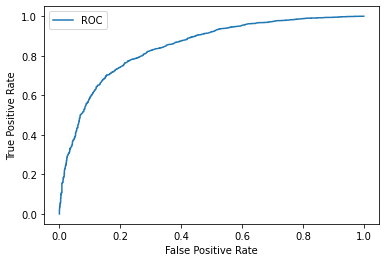

In [44]:
# Построим кривую
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label = 'ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc = 0)
plt.show()

In [45]:
# Посчитаем площадь под ROC-кривой
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [46]:
roc_auc_score(y_test, predictions[:, 1])

0.8470573270013568

In [47]:
# Можно посчитать с помощью более общего метода AUC
from sklearn.metrics import auc
auc(fpr, tpr)

0.8470573270013568

#### Площадь под ROC-кривой AUC (Area Under Curve) является агрегированной характеристикой качества классификации, не зависящей от соотношения цен ошибок. Чем больше значение AUC, тем «лучше» модель классификации. Площадь кривой нашей модели приближается к единице (85%).